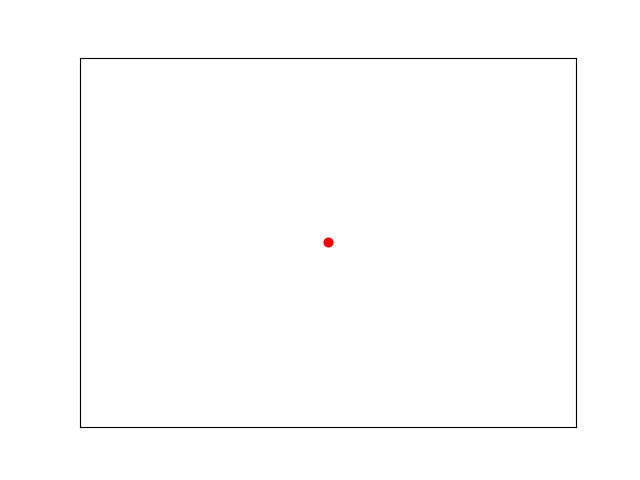

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import widgets

class InteractiveArrowPlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ax.axis([0, 1, 0, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        
        self.dragging = False  # Flag to track dragging state
        
        # Initial arrow from center to initial mouse position (default to center)
        self.arrow, = self.ax.plot([0.5, 0.5], [0.5, 0.5], lw=2, marker='o', color='red')
        self.annotation = self.ax.annotate('', xy=(0.5, 0.5), xytext=(0.5, 0.5),
                                           arrowprops=dict(facecolor='black', shrink=0, width=1, headwidth=8))
        # Connect to the mouse move event
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_mouse_move)
        # Connect to mouse press and release events
        self.fig.canvas.mpl_connect('button_press_event', self.on_mouse_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_mouse_release)

    def on_mouse_press(self, event):
        self.dragging = True  # Start dragging

    def on_mouse_release(self, event):
        self.dragging = False  # Stop dragging

    def on_mouse_move(self, event):
        if self.dragging and event.inaxes == self.ax:  # Only update if dragging
            # Update the arrow data
            self.arrow.set_data([0.5, event.xdata], [0.5, event.ydata])
            # Update the annotation for the arrow
            self.annotation.xy = (event.xdata, event.ydata)
            self.fig.canvas.draw()

# Create an instance of the interactive plot
plot = InteractiveArrowPlot()
plt.show()


In [4]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Arrow, NormalHead, ColumnDataSource, CrosshairTool, CustomJS

output_file("interactive_arrow.html")

p = figure(width=400, height=400, title="Interactive Arrow Plot")
p.add_tools(CrosshairTool())

source = ColumnDataSource(data={'x_ends': [0.5], 'y_ends': [0.5]})
p.scatter(x=[0.5], y=[0.5], size=10, color="navy", alpha=0.5, marker="circle")

arrow = Arrow(end=NormalHead(fill_color="firebrick", size=15),
              x_start=0.5, y_start=0.5, x_end='x_ends', y_end='y_ends', source=source)
p.add_layout(arrow)

# JavaScript callback
callback = CustomJS(args=dict(source=source), code="""
    const data = source.data;
    const x = cb_obj.x; // Get x-coordinate from callback object
    const y = cb_obj.y; // Get y-coordinate from callback object
    if (0 <= x && x <= 1 && 0 <= y && y <= 1) { // Check bounds
        data['x_ends'][0] = x;
        data['y_ends'][0] = y;
        source.change.emit(); // Notify listeners of data change
    }
""")

p.js_on_event('tap', callback)  # Use js_on_event to handle tap with JavaScript

show(p)
